In [45]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
data = pd.read_csv('data-sample-SIR-stats-lecture.csv')

In [5]:
print(data)

    pptID  age condition  score  heartrate
0       1   22   control    643         76
1       2   26      cdt1    234         72
2       3   24   control    356         73
3       4   24      cdt1    587         75
4       5   29      cdt1    561         75
5       6   31   control    544         75
6       7   20   control    470         74
7       8   23      cdt1    212         72
8       9   23   control    388         73
9      10   22      cdt1    201         72
10     11   28   control    278         72
11     12   29      cdt1    599         76
12     13   27   control    366         73
13     14   21      cdt1    597         75
14     15   22      cdt1    571         75


In [35]:
control_group = data[data.condition=="control"]['score']
cdt1_group = data[data.condition=="cdt1"]['score']

In [37]:
t_test_result = ttest_ind(control_group, cdt1_group, equal_var=True)

In [38]:
t_test_result

TtestResult(statistic=-0.1208923252933467, pvalue=0.9056248853282454, df=13.0)

In [41]:
def cohen_d(group1, group2):
    # Calculate the size of each group
    n1, n2 = len(group1), len(group2)
    # Calculate the variance of each group
    s1, s2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    # Calculate the pooled standard deviation (s)
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # Calculate the means of the groups
    u1, u2 = np.mean(group1), np.mean(group2)
    # Calculate the effect size
    return (u1 - u2) / s
cohens_d = cohen_d(control_group, cdt1_group)

In [42]:
cohens_d

-0.06256772255531334

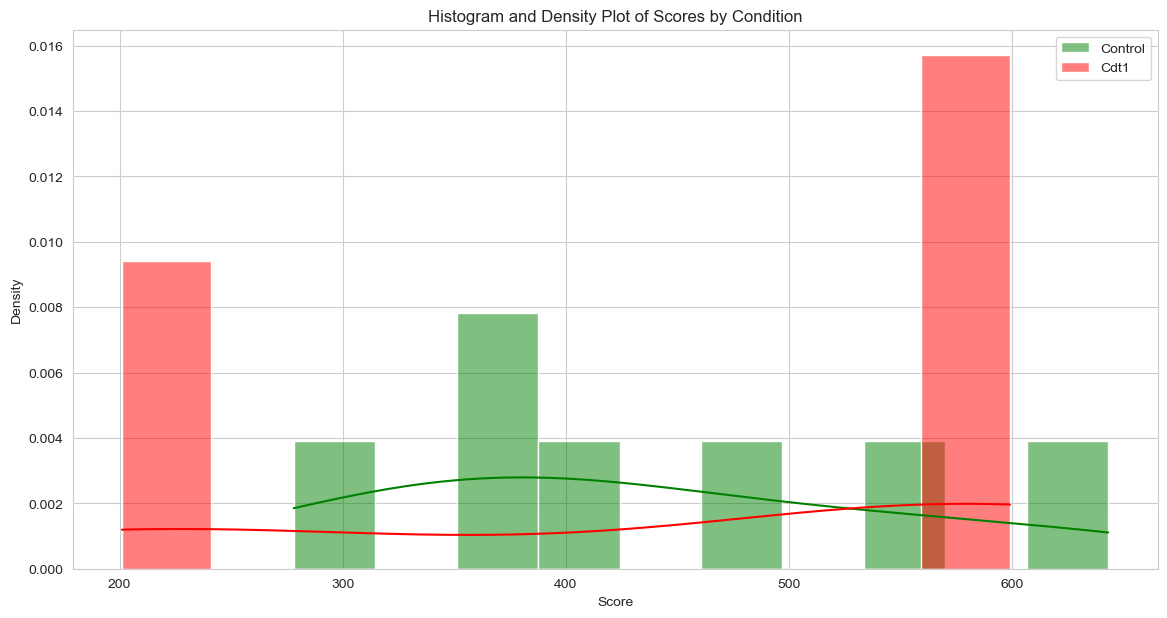

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set_style("whitegrid")

# Plot histograms and density plots for both conditions
plt.figure(figsize=(14, 7))

# Control group
sns.histplot(control_group, color="green", kde=True, stat="density", label='Control', bins=10, alpha=0.5)

# Cdt1 group
sns.histplot(cdt1_group, color="red", kde=True, stat="density", label='Cdt1', bins=10, alpha=0.5)

# Plot formatting
plt.title('Histogram and Density Plot of Scores by Condition')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()

plt.show()

In [46]:
u_test_result = mannwhitneyu(control_group, cdt1_group, alternative='two-sided')

u_test_result

MannwhitneyuResult(statistic=26.0, pvalue=0.8665112665112666)